In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import basics_library 

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math
import pickle

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# Example

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# load data
from sklearn.datasets import fetch_mldata
MNIST = fetch_mldata('MNIST original')
x = MNIST.data.astype('float64').T
y = np.reshape(MNIST.target, (-1, 1)).T
num_pts = np.size(y)

In [8]:
# subsample
num_samples = 10000
inds = np.random.permutation(num_pts)[:num_samples]
x_sample = x[:,inds]
y_sample = y[:,inds]

In [11]:
# import the v1 library
mylib2 = nonlib.early_stop_lib.superlearn_setup.Setup(x_sample,y_sample)

# choose features
layer_sizes = [784,10,10,10,10]

# choose features
mylib2.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib2.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib2.make_train_valid_split(train_portion = 0.8)

# choose cost
mylib2.choose_cost(name = 'multiclass_softmax')

# fit an optimization
mylib2.fit(max_its = 5000,alpha_choice = 10**(-1))

<IPython.core.display.Javascript object>


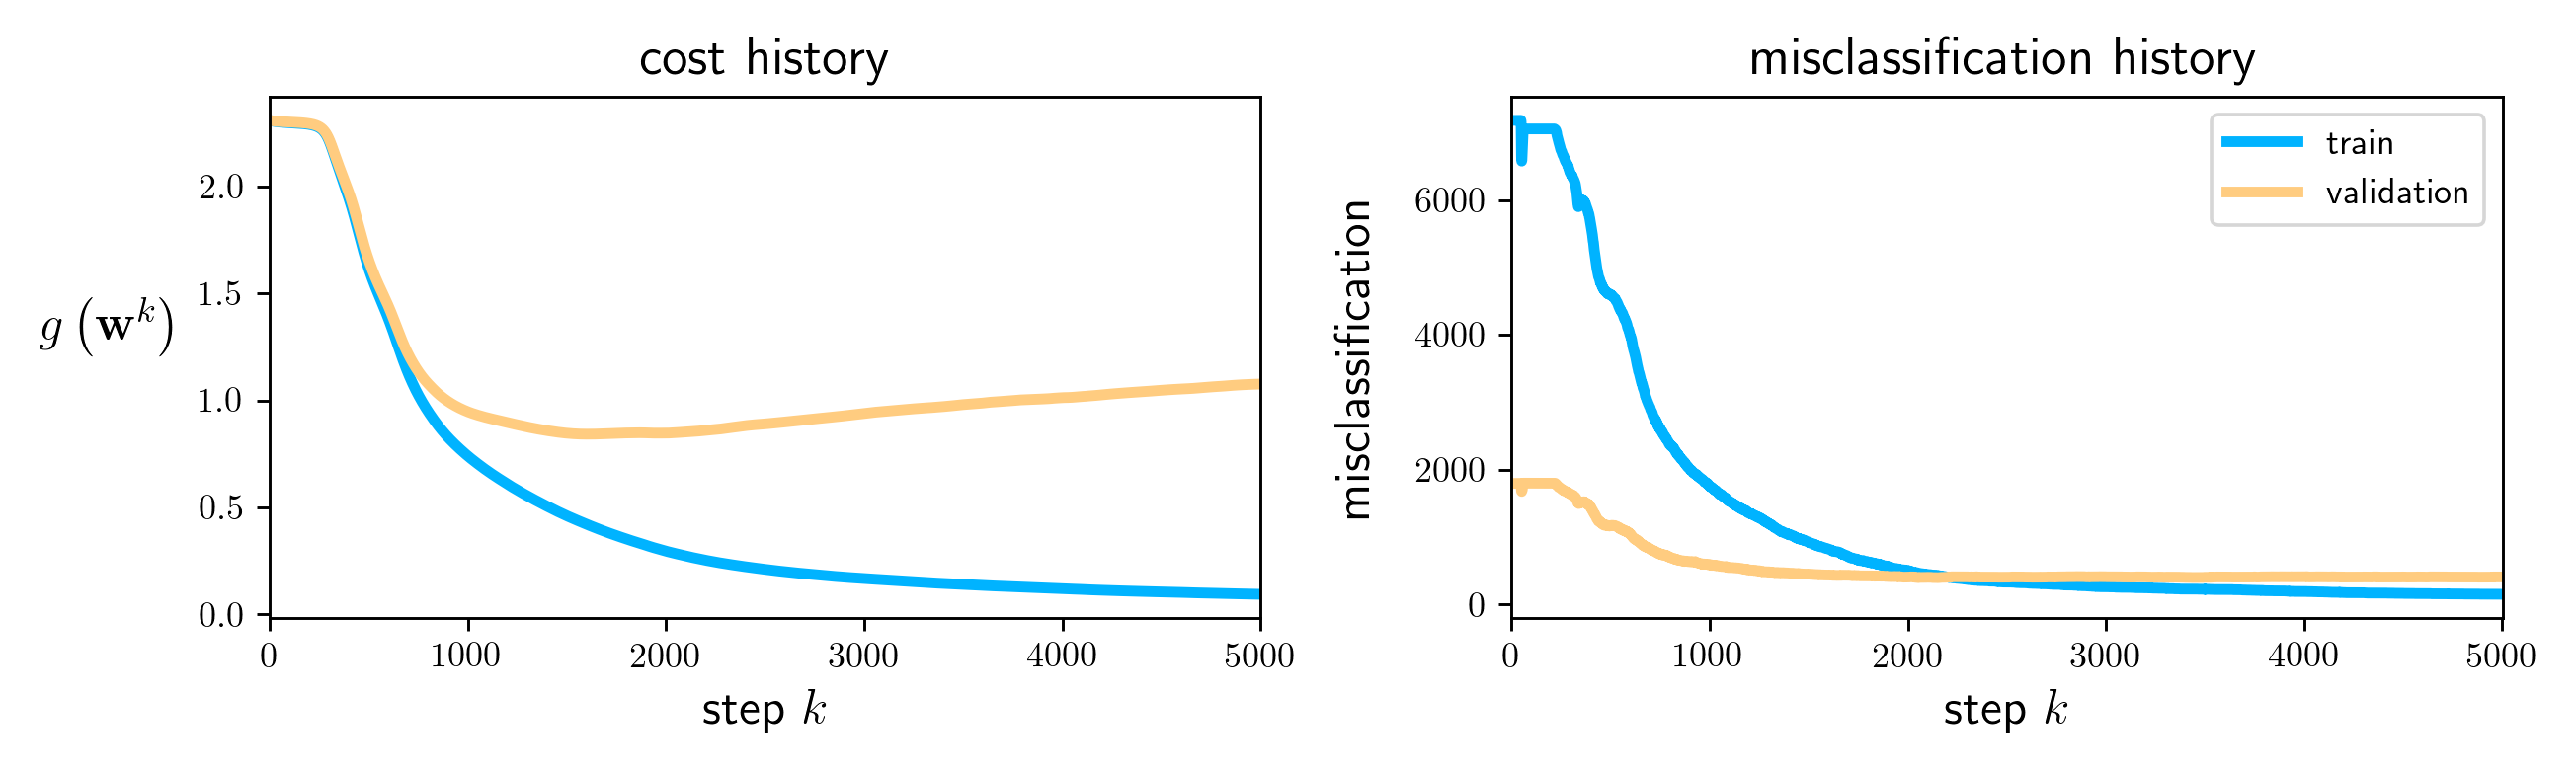

In [12]:
mylib2.show_histories()

In [13]:
np.min(mylib2.valid_count_histories)

394.0

In [14]:
(1 - 394/2000)

0.8029999999999999

In [16]:
np.min(mylib2.train_count_histories)

147.0

In [17]:
(1 - 147/8000)

0.981625